In [1]:
%matplotlib inline
import d2lzh as d2l
import torch
import sys
import time
from torch import optim, nn
from torch.nn import init
from torch.utils import data
from PIL import Image
import numpy as np
from torchvision import transforms
from torchvision import datasets
import torchvision.transforms.functional as F

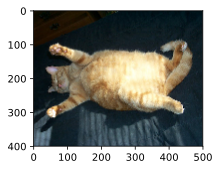

In [2]:
d2l.set_figsize()
img = Image.open('img/cat1.jpg')
d2l.plt.imshow(np.array(img))

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

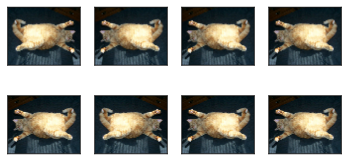

In [5]:
apply(img, transforms.RandomHorizontalFlip())

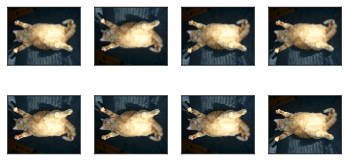

In [6]:
apply(img, transforms.RandomVerticalFlip())

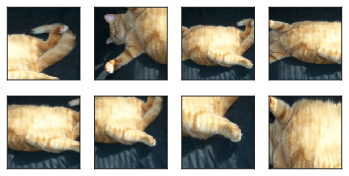

In [7]:
shape_aug = transforms.RandomResizedCrop(200, scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)

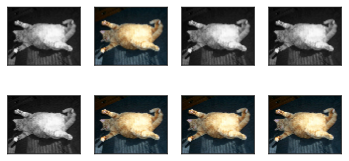

In [8]:
apply(img, transforms.RandomGrayscale(0.5))

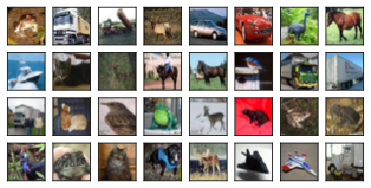

In [37]:
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = datasets.CIFAR10('~/datasets/cifar-10-batches-py', train=True)
datas = []
for image, label in dataset:
    datas.append([image, label])
list_t = [datas[i][0] for i in range(32)]

show_images(list_t, 4, 8, scale=0.8);

In [38]:
flip_aug = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

no_aug = transforms.Compose([
    transforms.ToTensor()
])

In [40]:
num_workers = 0 if sys.platform.startswith('win32') else 4